## Exemplo Perceptron

In [7]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

np.random.seed(1000)

nb_samples = 1000
nsb = int(nb_samples / 4)
X = np.zeros((nb_samples, 2))
Y = np.zeros((nb_samples, ))

X[0:nsb, :] = np.random.multivariate_normal([1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[0:nsb] = 0.0

X[nsb:(2 * nsb), :] = np.random.multivariate_normal([1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[nsb:(2 * nsb)] = 1.0

X[(2 * nsb):(3 * nsb), :] = np.random.multivariate_normal([-1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(2 * nsb):(3 * nsb)] = 0.0

X[(3 * nsb):, :] = np.random.multivariate_normal([-1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(3 * nsb):] = 1.0

ss = StandardScaler()
X = ss.fit_transform(X)

X, Y = shuffle(X, Y, random_state=1000)

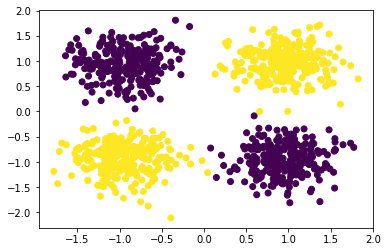

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [9]:
import numpy as np

from multiprocessing import cpu_count

from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

pc = Perceptron(penalty='l2', alpha=0.1, max_iter=1000, n_jobs=cpu_count(), random_state=1000)
print(np.mean(cross_val_score(pc, X, Y, cv=10)))

0.5039999999999999


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_model(clf):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Superfície de Decisão')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

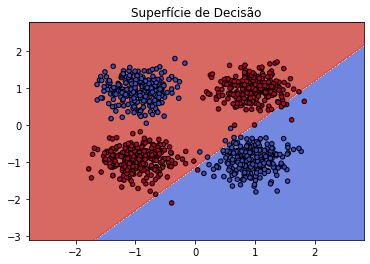

In [11]:
pc.fit(X, Y)
plot_model(pc)

## MLP

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(4, input_dim=2))
model.add(Activation('tanh'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

model.fit(X_train, 
          to_categorical(Y_train, num_classes=2), 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, to_categorical(Y_test, num_classes=2)))

Epoch 1/100
22/22 [==============================] - 1s 18ms/step - loss: 0.7081 - accuracy: 0.5200 - val_loss: 0.6911 - val_accuracy: 0.5767
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7021 - accuracy: 0.5614 - val_loss: 0.6903 - val_accuracy: 0.6100
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6982 - accuracy: 0.5771 - val_loss: 0.6902 - val_accuracy: 0.6200
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.6071 - val_loss: 0.6905 - val_accuracy: 0.6200
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5886 - val_loss: 0.6918 - val_accuracy: 0.6067
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5814 - val_loss: 0.6922 - val_accuracy: 0.5867
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5300 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9900 - val_loss: 0.2289 - val_accuracy: 0.9900
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.9914 - val_loss: 0.2221 - val_accuracy: 0.9933
Epoch 61/100
22/22 [==============================] - 0s 5ms/step - loss: 0.2082 - accuracy: 0.9914 - val_loss: 0.2154 - val_accuracy: 0.9933
Epoch 62/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2020 - accuracy: 0.9914 - val_loss: 0.2090 - val_accuracy: 0.9933
Epoch 63/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1959 - accuracy: 0.9914 - val_loss: 0.2030 - val_accuracy: 0.9933
Epoch 64/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1903 - accuracy: 0.9914 - val_loss: 0.1971 - val_accuracy: 0.9933
Epoch 65/100
22/22 [==============================] - 0s 6ms/step - loss: 0.1847 - accuracy: 0.9914 - val_loss: 0.1917 - val_accuracy: 0.9933
Epoch 

In [20]:
Y_eval_mlp = np.argmax(model.predict(X_test), axis=1)

10/10 [==============================] - 0s 2ms/step


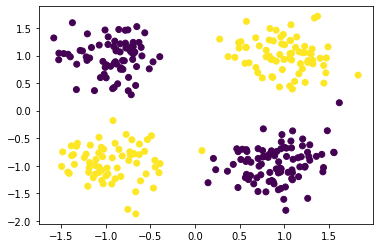

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp)
plt.show()

In [22]:
import numpy as np

Xm = np.linspace(-2.0, 2.0, 1000)
Ym = np.linspace(-2.0, 2.0, 1000)
Xmg, Ymg = np.meshgrid(Xm, Ym)
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T

Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

31250/31250 [==============================] - 44s 1ms/step


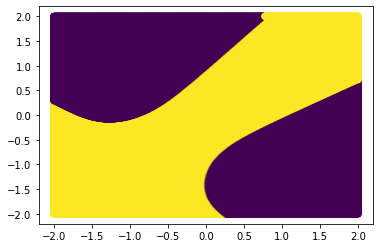

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
plt.show()

In [32]:
model = Sequential()

model.add(Dense(4, input_dim=2))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

model.fit(X_train, 
          to_categorical(Y_train, num_classes=2), 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, to_categorical(Y_test, num_classes=2)))

Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 0.6502 - accuracy: 0.6571 - val_loss: 0.6373 - val_accuracy: 0.7267
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6329 - accuracy: 0.7314 - val_loss: 0.6208 - val_accuracy: 0.7600
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6159 - accuracy: 0.7414 - val_loss: 0.6041 - val_accuracy: 0.7567
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5990 - accuracy: 0.7586 - val_loss: 0.5868 - val_accuracy: 0.8467
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5818 - accuracy: 0.8500 - val_loss: 0.5691 - val_accuracy: 0.9200
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.9043 - val_loss: 0.5506 - val_accuracy: 0.9533
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.9457 - val_loss: 0.5311 - val_accuracy: 0.9900
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9986 - val_loss: 0.0536 - val_accuracy: 1.0000
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9986 - val_loss: 0.0521 - val_accuracy: 1.0000
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9986 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 62/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9986 - val_loss: 0.0494 - val_accuracy: 1.0000
Epoch 63/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9986 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9986 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 65/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9986 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 

In [34]:
Y_eval_mlp = np.argmax(model.predict(X_test), axis=1)

10/10 [==============================] - 0s 1ms/step


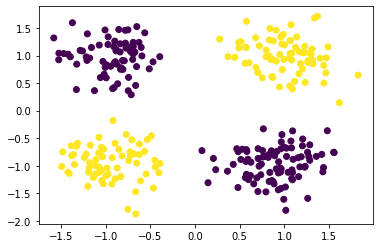

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp)
plt.show()

In [36]:
import numpy as np

Xm = np.linspace(-2.0, 2.0, 1000)
Ym = np.linspace(-2.0, 2.0, 1000)
Xmg, Ymg = np.meshgrid(Xm, Ym)
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T

Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

31250/31250 [==============================] - 44s 1ms/step


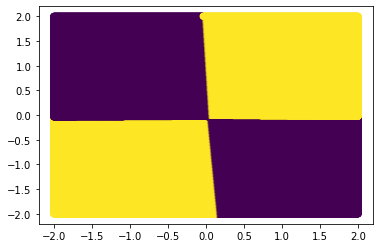

In [37]:
import matplotlib.pyplot as plt
plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
plt.show()

### Algoritmos

In [49]:
#SGD with momentum in Keras
from keras.optimizers import SGD

...

sgd = SGD(lr=0.0001, momentum=0.8, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#RMSProp with Keras
from keras.optimizers import RMSprop

...

rms_prop = RMSprop(lr=0.0001, rho=0.8, epsilon=1e-6, decay=1e-2)

model.compile(optimizer=rms_prop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Adam with Keras
from keras.optimizers import Adam

...

adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.9, epsilon=1e-6, decay=1e-2)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#AdaGrad with Keras
from keras.optimizers import Adagrad

...

adagrad = Adagrad(lr=0.0001, epsilon=1e-6, decay=1e-2)

model.compile(optimizer=adagrad,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#AdaDelta with Keras
from keras.optimizers import Adadelta

...

adadelta = Adadelta(lr=0.0001, rho=0.9, epsilon=1e-6, decay=1e-2)

model.compile(optimizer=adadelta,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Examplo de Dropout

In [50]:
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

width = height = X_train.shape[1]

X_train = X_train.reshape((X_train.shape[0], width * height)).astype(np.float32) / 255.0
X_test = X_test.reshape((X_test.shape[0], width * height)).astype(np.float32) / 255.0

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(2048, input_shape=(width * height, )))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [52]:
history = model.fit(X_train, Y_train,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_test, Y_test))


Epoch 1/200
235/235 [==============================] - 47s 183ms/step - loss: 0.3936 - accuracy: 0.8996 - val_loss: 0.1651 - val_accuracy: 0.9515
Epoch 2/200
235/235 [==============================] - 43s 184ms/step - loss: 0.1330 - accuracy: 0.9613 - val_loss: 0.1160 - val_accuracy: 0.9654
Epoch 3/200
235/235 [==============================] - 39s 165ms/step - loss: 0.0861 - accuracy: 0.9752 - val_loss: 0.0932 - val_accuracy: 0.9704
Epoch 4/200
235/235 [==============================] - 40s 169ms/step - loss: 0.0620 - accuracy: 0.9819 - val_loss: 0.0742 - val_accuracy: 0.9767
Epoch 5/200
235/235 [==============================] - 43s 182ms/step - loss: 0.0457 - accuracy: 0.9866 - val_loss: 0.0721 - val_accuracy: 0.9786
Epoch 6/200
235/235 [==============================] - 43s 184ms/step - loss: 0.0318 - accuracy: 0.9914 - val_loss: 0.0608 - val_accuracy: 0.9811
Epoch 7/200
235/235 [==============================] - 40s 172ms/step - loss: 0.0231 - accuracy: 0.9941 - val_loss: 0.0568 -

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
from keras.constraints import maxnorm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

model = Sequential()

model.add(Dropout(0.25, input_shape=(width * height, ), seed=1000))

model.add(Dense(2048, kernel_initializer='uniform', kernel_constraint=maxnorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(1024, kernel_initializer='uniform', kernel_constraint=maxnorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(1024, kernel_initializer='uniform', kernel_constraint=maxnorm(2.0)))
model.add(Activation('relu'))
model.add(Dropout(0.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=SGD(lr=0.1, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_test, Y_test))

## Examplo de Normalização de lote

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(2048, input_shape=(width * height, )))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=0.001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_test, Y_test))
